In [4]:
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()


import json
import math
import os
import time

%load_ext autoreload
%autoreload 2

EXPERIMENTS_PATH = os.path.join(os.getcwd(), 'src', 'experiments')
print(EXPERIMENTS_PATH)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/deepdeepfakes/cs231n-project/src/experiments


In [14]:
MODEL_DISP_LIM = 50
FIG_WIDTH = 20
ROW_HEIGHT = 10
NUM_COLS = 4

def load_models(path=EXPERIMENTS_PATH):
    ret = {}
    for proj in os.listdir(path):
        proj_path = os.path.join(path, proj)
        for exp in os.listdir(proj_path):
            stats_path = os.path.join(proj_path, exp, 'stats')
            losses = []
            params = {}
            tags = []
            for stat_file in sorted(os.listdir(stats_path)):
                with open(os.path.join(stats_path,stat_file)) as f:
                    curr_stats = json.load(f)
                    params = curr_stats['optimizer_params']
                    tags = curr_stats['tags']
                    losses.extend(curr_stats['losses'])

            ret[f'{proj}_{exp}'] = {
                'params': params,
                'losses': losses,
                'tags': tags
            }
    return ret

def plot_model_losses(models, tags=[]):
    models = {m: v for m, v in models.items() if tags == [] or set(v['tags']) & set(tags)}
    
    model_loss_pairs = sorted([(m, min(v['losses'])) for m, v in models.items()], 
                              key=lambda x: -int(x[0].split('_')[-1]))
    model_loss_pairs = sorted(model_loss_pairs, key=lambda z: z[1])
    model_loss_pairs = model_loss_pairs[:MODEL_DISP_LIM]
    
    num_models = len(model_loss_pairs)
    num_rows = num_models // NUM_COLS + 1 if num_models else 0
    fig, axes = plt.subplots(nrows=num_rows, ncols=NUM_COLS, sharey=False, figsize=(FIG_WIDTH, num_rows*ROW_HEIGHT))
    fig.subplots_adjust(hspace=.2)
    
    for i, (model, best_loss) in enumerate(model_loss_pairs):
        stats = models[model]
        losses = stats["losses"]

        if num_rows == 1:
            ax = axes[i % NUM_COLS]
        else:
            ax = axes[i // NUM_COLS, i % NUM_COLS]
            
        ax.plot([math.log(l) for l in losses[-1000:]])
        ax.set_title(f'#{i + 1} - {model}: ({int(best_loss)})')

    if num_rows > 1:
        for i in range(num_models, NUM_COLS * num_rows):
            axes[i // NUM_COLS, i % NUM_COLS].axis('off')
    
    plt.gcf().show()

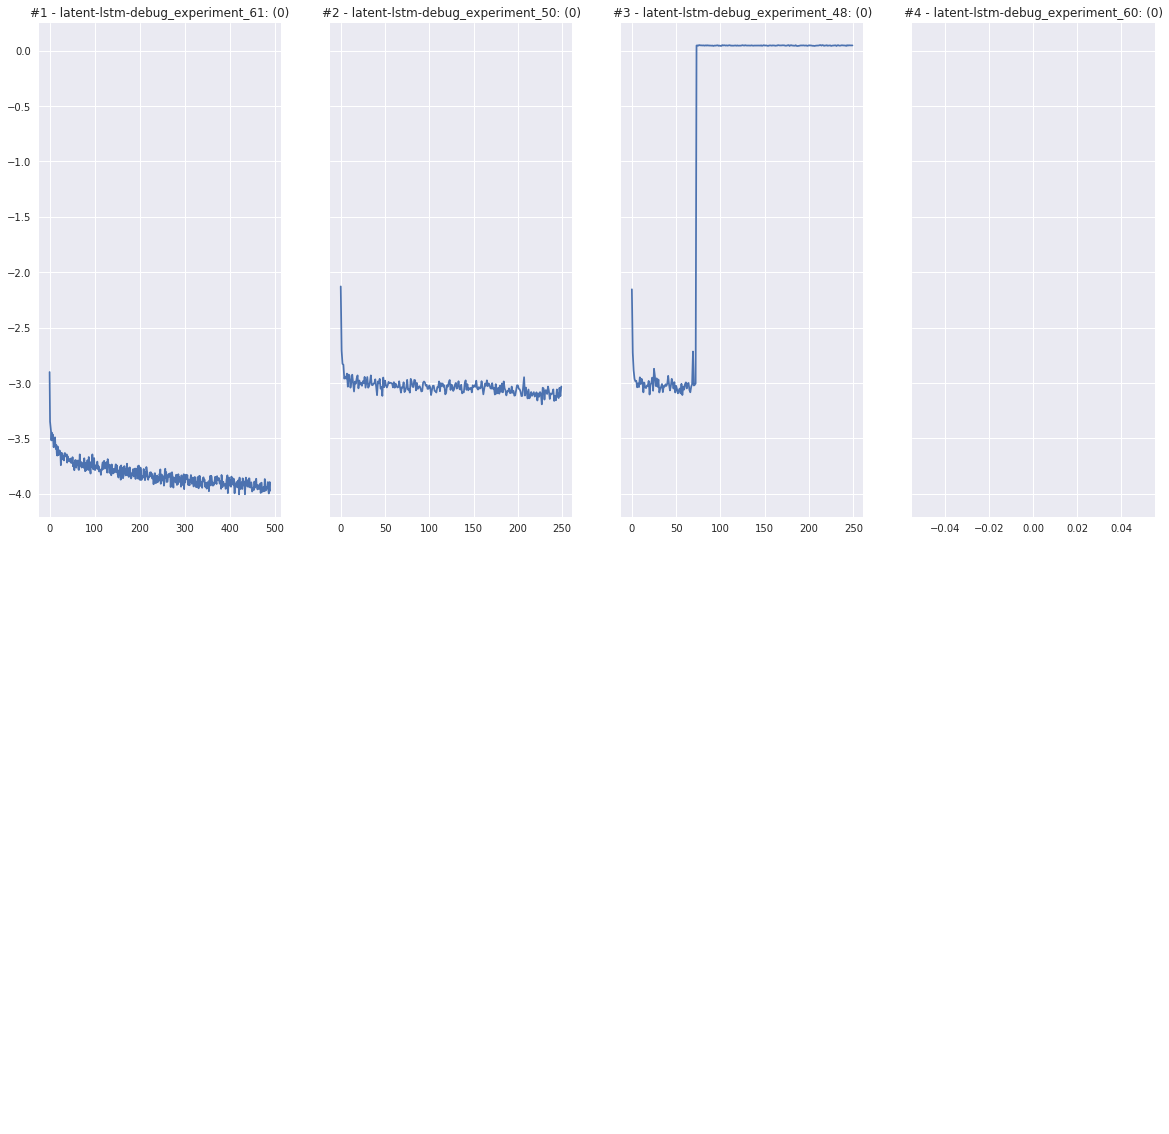

KeyboardInterrupt: 

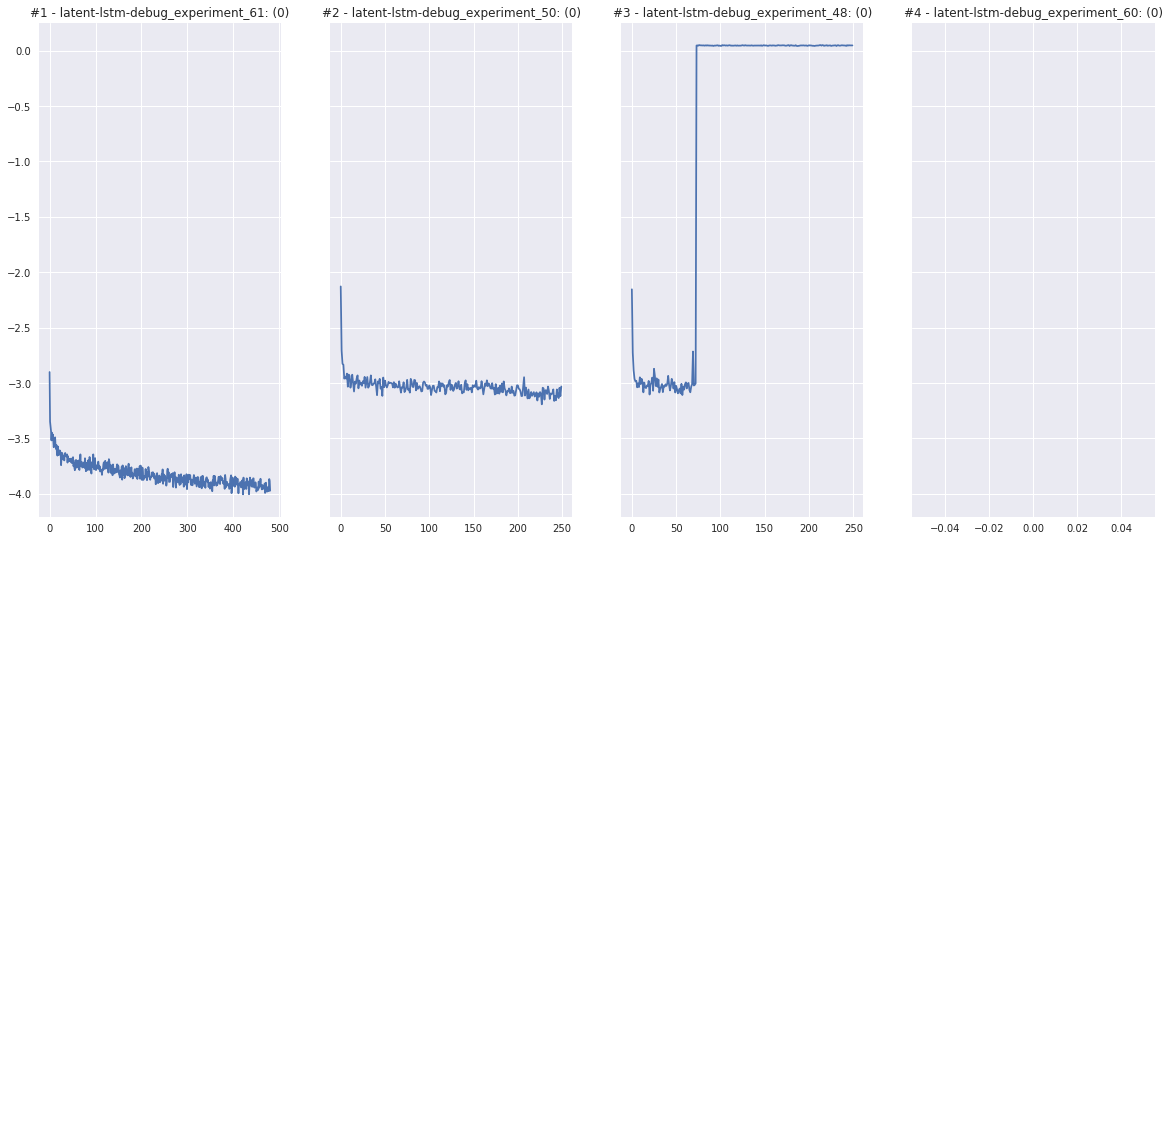

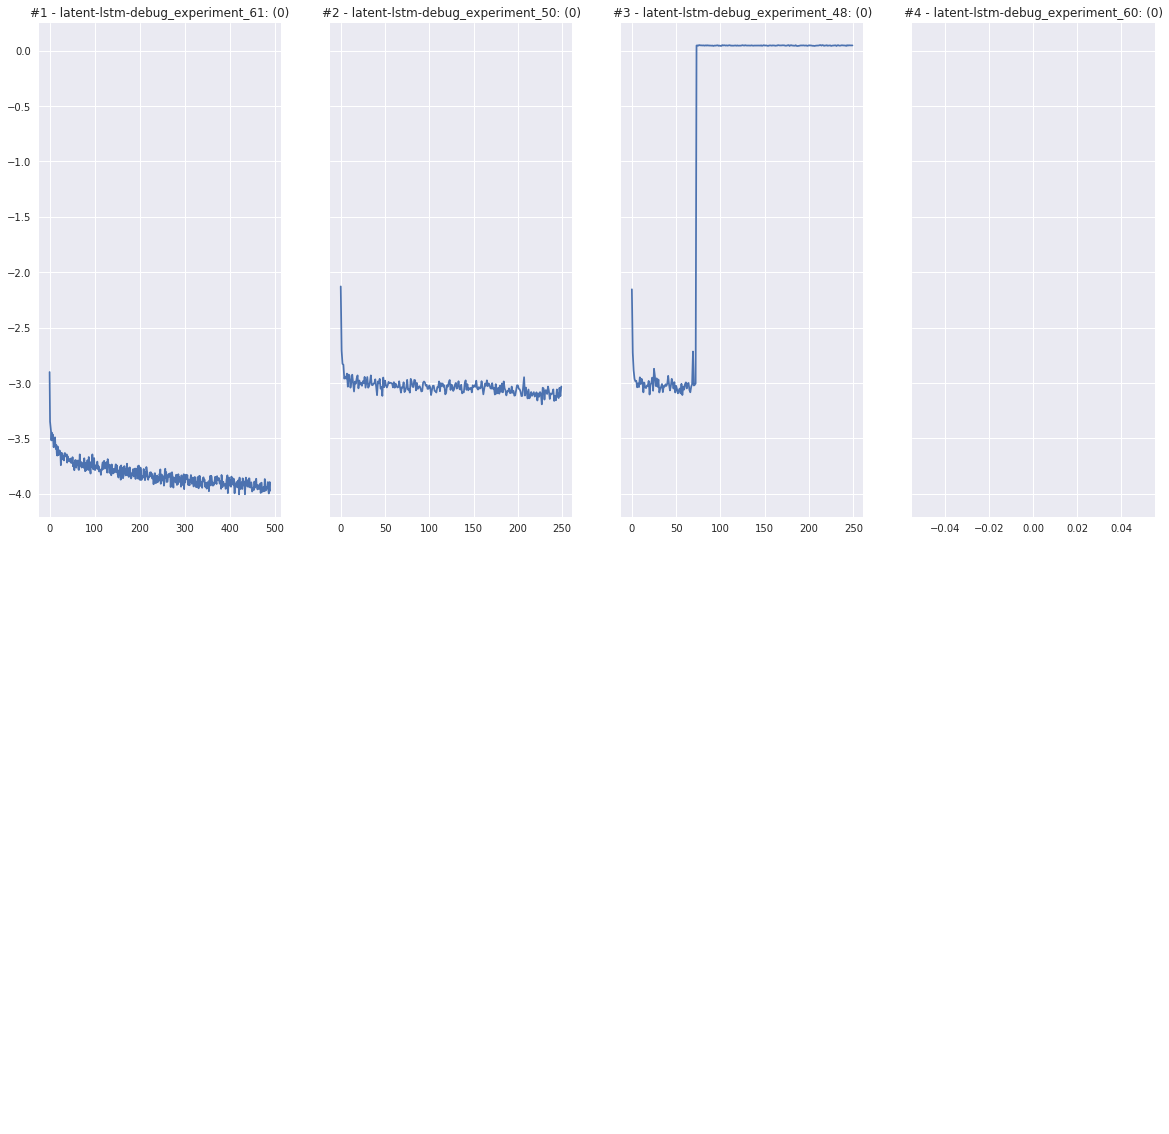

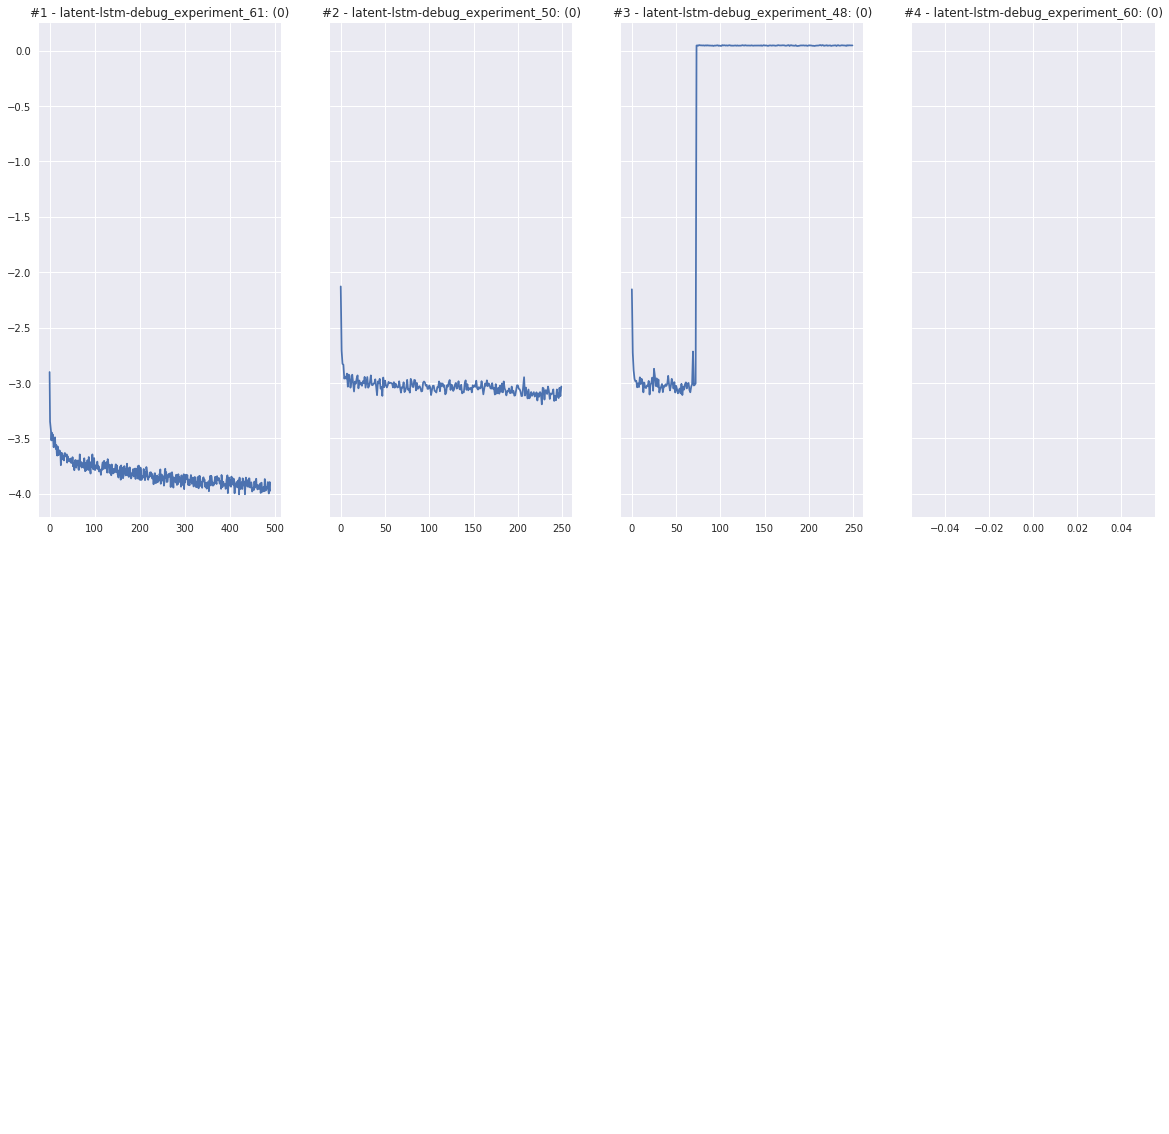

In [17]:
%matplotlib inline
from IPython import display

TAGS = ['lstm-gan-tune']

def display_loop(seconds):
    for i in range(seconds):
        models = load_models()
        plot_model_losses(models, TAGS)

        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(1)

display_loop(20)